In [1]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans
import pandas as pd

Caso estejas usando o google coolab, descomente o seguinte código:

In [2]:
caminho = "datasets/poluicao_ar.csv"
# !pip install wget
# !wget https://raw.githubusercontent.com/plorazxi/Inteligencia-computacional/refs/heads/main/Aulas-faculdade/datasets/poluicao_ar.csv
# caminho = "/content/poluicao_ar.csv"

In [3]:
X = pd.read_csv(caminho, sep=";")
X.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [4]:
X = X.drop(columns = ['Air Quality'])
X.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535


In [5]:
X = X[['Temperature', 'Humidity']]

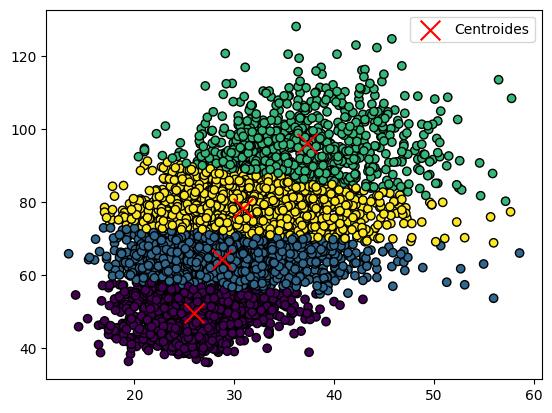

In [6]:

kmeans = KMeans(n_clusters = 4, #numero de clusters
init = 'random', n_init = 30, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 10) #numero máximo de iterações

pred_y = kmeans.fit_predict(X)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Separando os dados por cluster
grupo_0 = X[labels == 0]
grupo_1 = X[labels == 1]
grupo_2 = X[labels == 2]
grupo_3 = X[labels == 3]

# Plotando os pontos e os centróides
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k') # Use .iloc for integer-location based indexing
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroides")
plt.legend()
plt.show()

In [7]:
print(np.std(grupo_0))
print(np.std(grupo_1))
print(np.std(grupo_2))
print(np.std(grupo_3))

Temperature    4.167547
Humidity       5.004945
dtype: float64
Temperature    5.896191
Humidity       4.141703
dtype: float64
Temperature    6.465974
Humidity       7.682887
dtype: float64
Temperature    6.252505
Humidity       4.602572
dtype: float64


c:\Users\paulo\Documents\Projetos\Inteligencia computacional\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
